# Assignment 10

We are given the following systems to analyze numerically and analytically:

1. 
time interval: 0 to 10 seconds 

Equation: $\ddot{x} + \dot{x} = 0$

initial conditions: $x(0) = 1$, $\dot{x}(0) = 1$

2. 

time interval: 0 to 25 seconds

Equation: $\ddot{x} + 0.125\dot{x} + x = 0$

initial conditions: $x(0) = 2$, $\dot{x}(0) = 0$

3. 

time interval: 0 to 70 seconds

Equation: $\ddot{x} + 0.125\dot{x} + x = 3cos(t)$

initial conditions: $x(0) = 2$, $\dot{x}(0) = 0$

4.

time interval: 0 to 100 seconds

Equation: $\ddot{x} +  x = 0.5cos(0.8t)$

initial conditions: $x(0) = 1$, $\dot{x}(0) = 0$





## System Parameters

In [65]:
step_sizes = [0.1, 0.05, 0.01]
# 4 systems 3 step sizes = 12 simulations

## General Imports

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Systems

### System 1

In [74]:
analytical_solution = lambda t: np.cos(t) + np.sin(t)
euler_equation = lambda x, v, dt, t=None: v - x*dt
inital_conditions = (1, 1)  # x(0) = 1, v(0) = 1
timespan =  [0, 10]

### System 2

In [78]:
analytical_solution = lambda t: np.exp(-0.0625*t) * (2 * np.cos(0.998*t) - 0.125 * np.sin(0.998*t))
euler_equation = lambda x, v, dt, t=None: (-0.125*v - x)*dt + v
inital_conditions = (2, 0)  # x(0) = 2, v(0) = 0
timespan =  [0, 25]

### System 3

In [83]:
analytical_solution = lambda t: np.exp(-0.0625*t) * (2 * np.cos(0.998*t) - 23.92 * np.sin(0.998*t)) + 24 * np.sin(t)
euler_equation = lambda x, v, dt, t_prev: (3*np.cos(t_prev) -0.125*v - x)*dt + v
inital_conditions = (2, 0)  # x(0) = 2, v(0) = 0
timespan =  [0, 70]

### System 4

In [87]:
analytical_solution = lambda t: -0.389*np.cos(t)+1.389*np.cos(0.8*t)
euler_equation = lambda x, v, dt, t_prev: (0.5*np.cos(0.8*t_prev) - x)*dt + v
inital_conditions = (1, 0)  # x(0) = 1, v(0) = 0
timespan =  [0, 100]

## Plot of analytical vs numerical solution

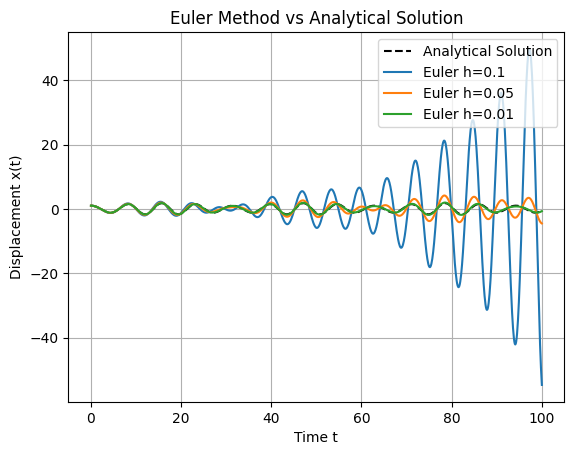

In [88]:
# plot the analytical solution over the time span
t_analytical = np.linspace(timespan[0], timespan[1], 1000)
x_analytical = analytical_solution(t_analytical)
plt.plot(t_analytical, x_analytical, label='Analytical Solution', color='black', linestyle='--')

for h in step_sizes:
    t_values = np.arange(0, timespan[1] + h, h)
    x_values = np.zeros(len(t_values))
    v_values = np.zeros(len(t_values))

    # Initial conditions
    x_values[0], v_values[0] = inital_conditions

    for i in range(1, len(t_values)):
        x_values[i] = x_values[i-1] + v_values[i-1]*h
        v_values[i] = euler_equation(x_values[i-1], v_values[i-1], h, t_values[i-1])
    plt.plot(t_values, x_values, label=f'Euler h={h}')

plt.title('Euler Method vs Analytical Solution')
plt.xlabel('Time t')
plt.ylabel('Displacement x(t)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

## Plot showing absolute and relative error

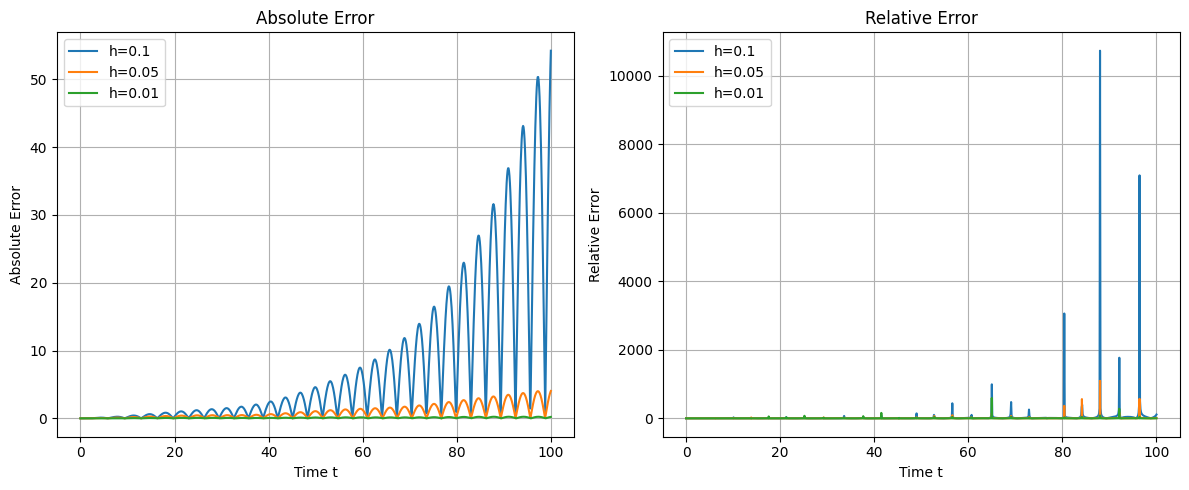

In [89]:
plt.figure(figsize=(12, 5))
for h in step_sizes:
    t_values = np.arange(timespan[0], timespan[1] + h, h)
    x_values = np.zeros(len(t_values))
    v_values = np.zeros(len(t_values))
    # Initial conditions
    x_values[0], v_values[0] = inital_conditions

    for i in range(1, len(t_values)): 
        x_values[i] = x_values[i-1] + v_values[i-1]*h
        v_values[i] = euler_equation(x_values[i-1], v_values[i-1], h, t_values[i-1])
    
    x_analytical_at_t = analytical_solution(t_values)
    absolute_error = np.abs(x_analytical_at_t - x_values)
    relative_error = absolute_error / np.abs(x_analytical_at_t)
    
    plt.subplot(1, 2, 1)
    plt.plot(t_values, absolute_error, label=f'h={h}')
    
    plt.subplot(1, 2, 2)
    plt.plot(t_values, relative_error, label=f'h={h}')

plt.subplot(1, 2, 1)
plt.title('Absolute Error')
plt.xlabel('Time t')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Relative Error')
plt.xlabel('Time t')
plt.ylabel('Relative Error')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Error convergence analysis

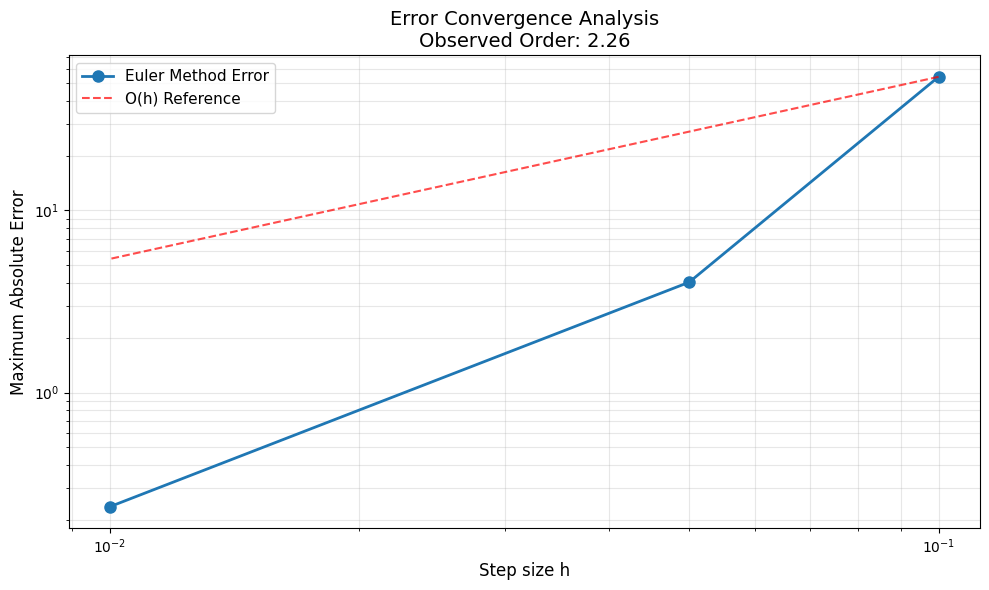

Convergence order: 2.256


In [90]:
# Plotting error convergence
hs = []
max_absolute_errors = []

for h in step_sizes:
    t_values = np.arange(timespan[0], timespan[1] + h, h)
    x_values = np.zeros(len(t_values))
    v_values = np.zeros(len(t_values))
    # Initial conditions
    x_values[0], v_values[0] = inital_conditions

    for i in range(1, len(t_values)): 
        x_values[i] = x_values[i-1] + v_values[i-1]*h
        v_values[i] = euler_equation(x_values[i-1], v_values[i-1], h, t_values[i-1])
    
    x_analytical_at_t = analytical_solution(t_values)
    absolute_error = np.abs(x_analytical_at_t - x_values)
    hs.append(h)
    max_absolute_errors.append(np.max(absolute_error))

# Plot with reference line
plt.figure(figsize=(10, 6))
plt.loglog(hs, max_absolute_errors, marker='o', markersize=8, linewidth=2, label='Euler Method Error')

# Add reference line for O(h) convergence
reference_line = np.array(hs) * max_absolute_errors[0] / hs[0]
plt.loglog(hs, reference_line, '--', linewidth=1.5, color='red', alpha=0.7, label='O(h) Reference')

# Calculate and display slope
log_hs = np.log(hs)
log_errors = np.log(max_absolute_errors)
slope = np.polyfit(log_hs, log_errors, 1)[0]

plt.title(f'Error Convergence Analysis\nObserved Order: {slope:.2f}', fontsize=14)
plt.xlabel('Step size h', fontsize=12)
plt.ylabel('Maximum Absolute Error', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Convergence order: {slope:.3f}")
